<a href="https://colab.research.google.com/github/ZakariaSoukrat/SkyForcasters/blob/main/Projet_AAA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [6]:
#import of necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Data exploration using visualizations, statistics

In [7]:
#Read in Data

# Read the CSV file into a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/ZakariaSoukrat/SkyForcasters/3720e6ecef10a640574d10c9b9e964f69dc213c1/Clean_Dataset.csv")

#data infiormation
print(data.describe())
print()
# Display the DataFrame
data.head()

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000



,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
data.shape

(300153, 12)

We can see that Data set contains 12 colums and 300153 samples :    
The Dataset has enough samples for training and testing ❎

The colums 0 and flight don't have any influence on the price, so we will drop them ❌


In [9]:
#Drop non useful colums
data=data.drop(["Unnamed: 0"],axis=1)
data=data.drop(["flight"],axis=1)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


we can see that the currency used is not dollar or euro (since the price range is 1105-123071), since the dataSet only includes flights in india we suppose that the devise used is the Indian Rupee,
we know that 1 euro = 91.22 Indian Rupee, we will change that in the Dataset

In [11]:
#change the currency to euro
data['price']=data['price']/91.22

In [12]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,229.003075
std,7.191997,13.561004,248.824461
min,0.830000,1.000000,12.113572
25%,6.830000,15.000000,52.433677
50%,11.250000,26.000000,81.396624
75%,16.170000,38.000000,466.136812
max,49.830000,49.000000,1349.166849


In [13]:
# Check for missing values
print(data.isnull().sum())


airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


we have no missing values ✅

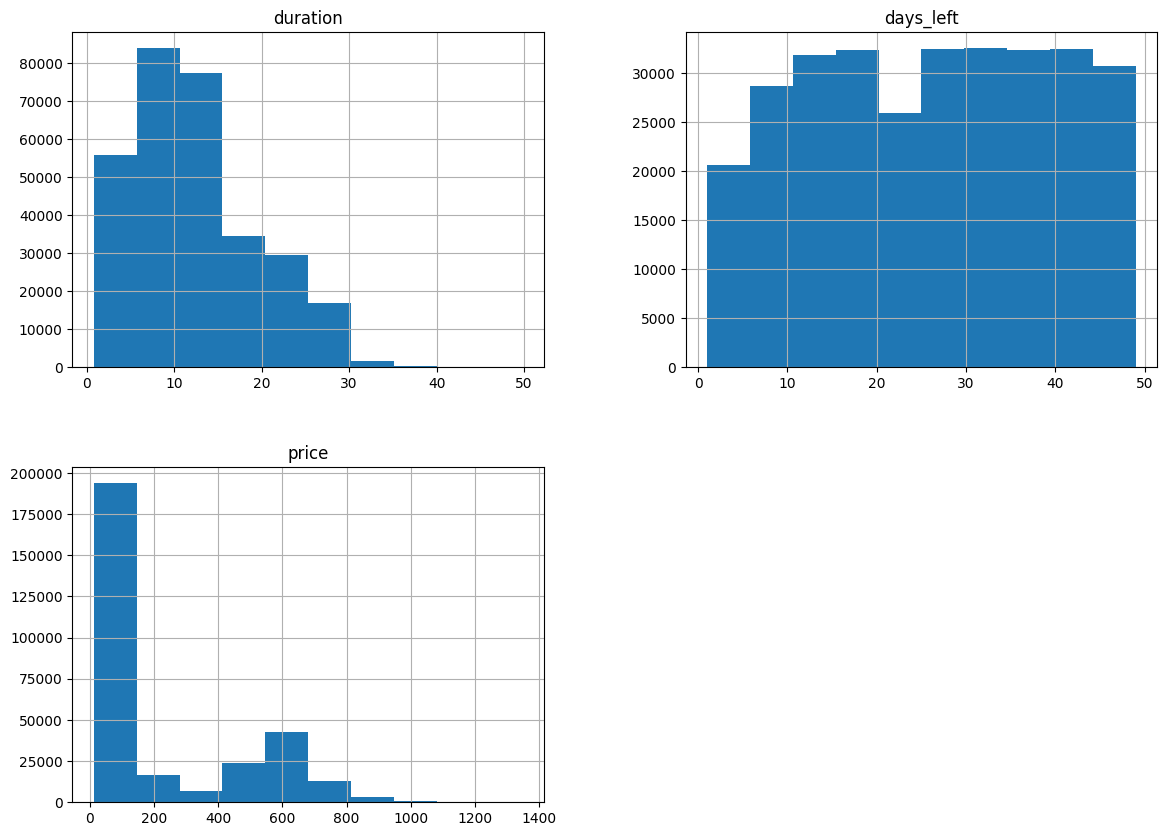

In [14]:
data.hist(bins=10,figsize=(14,10))
plt.show();

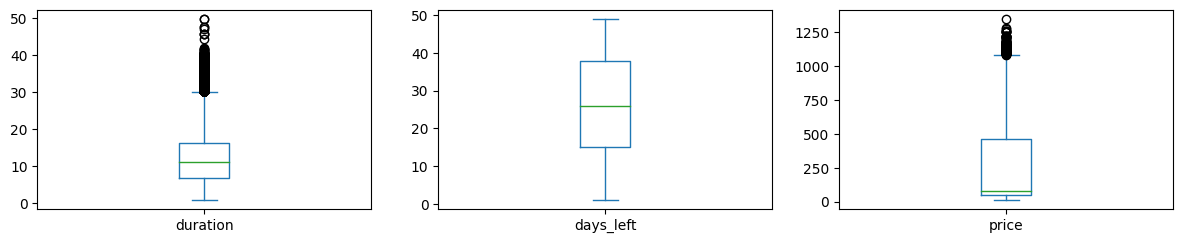

In [15]:
data.plot(kind ="box",subplots=True,figsize=(25,15),layout=(5,5));

we can see that we have an uniform distribution for days_left between 1 and 49

most of the flights take 5h to 15h, this is due to the stops that are included in the flight duration (all the flights are in India and we can see flights that take 49h)

the prices are mostly between 13 and 200 euros, which is normal since most of the airlines in India are considerated as low cost

In [16]:
# Display unique values for categorical columns
categorical_cols = ['airline', 'class', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops']
for col in categorical_cols:
    print(col, data[col].unique())



airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
class ['Economy' 'Business']
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
stops ['zero' 'one' 'two_or_more']


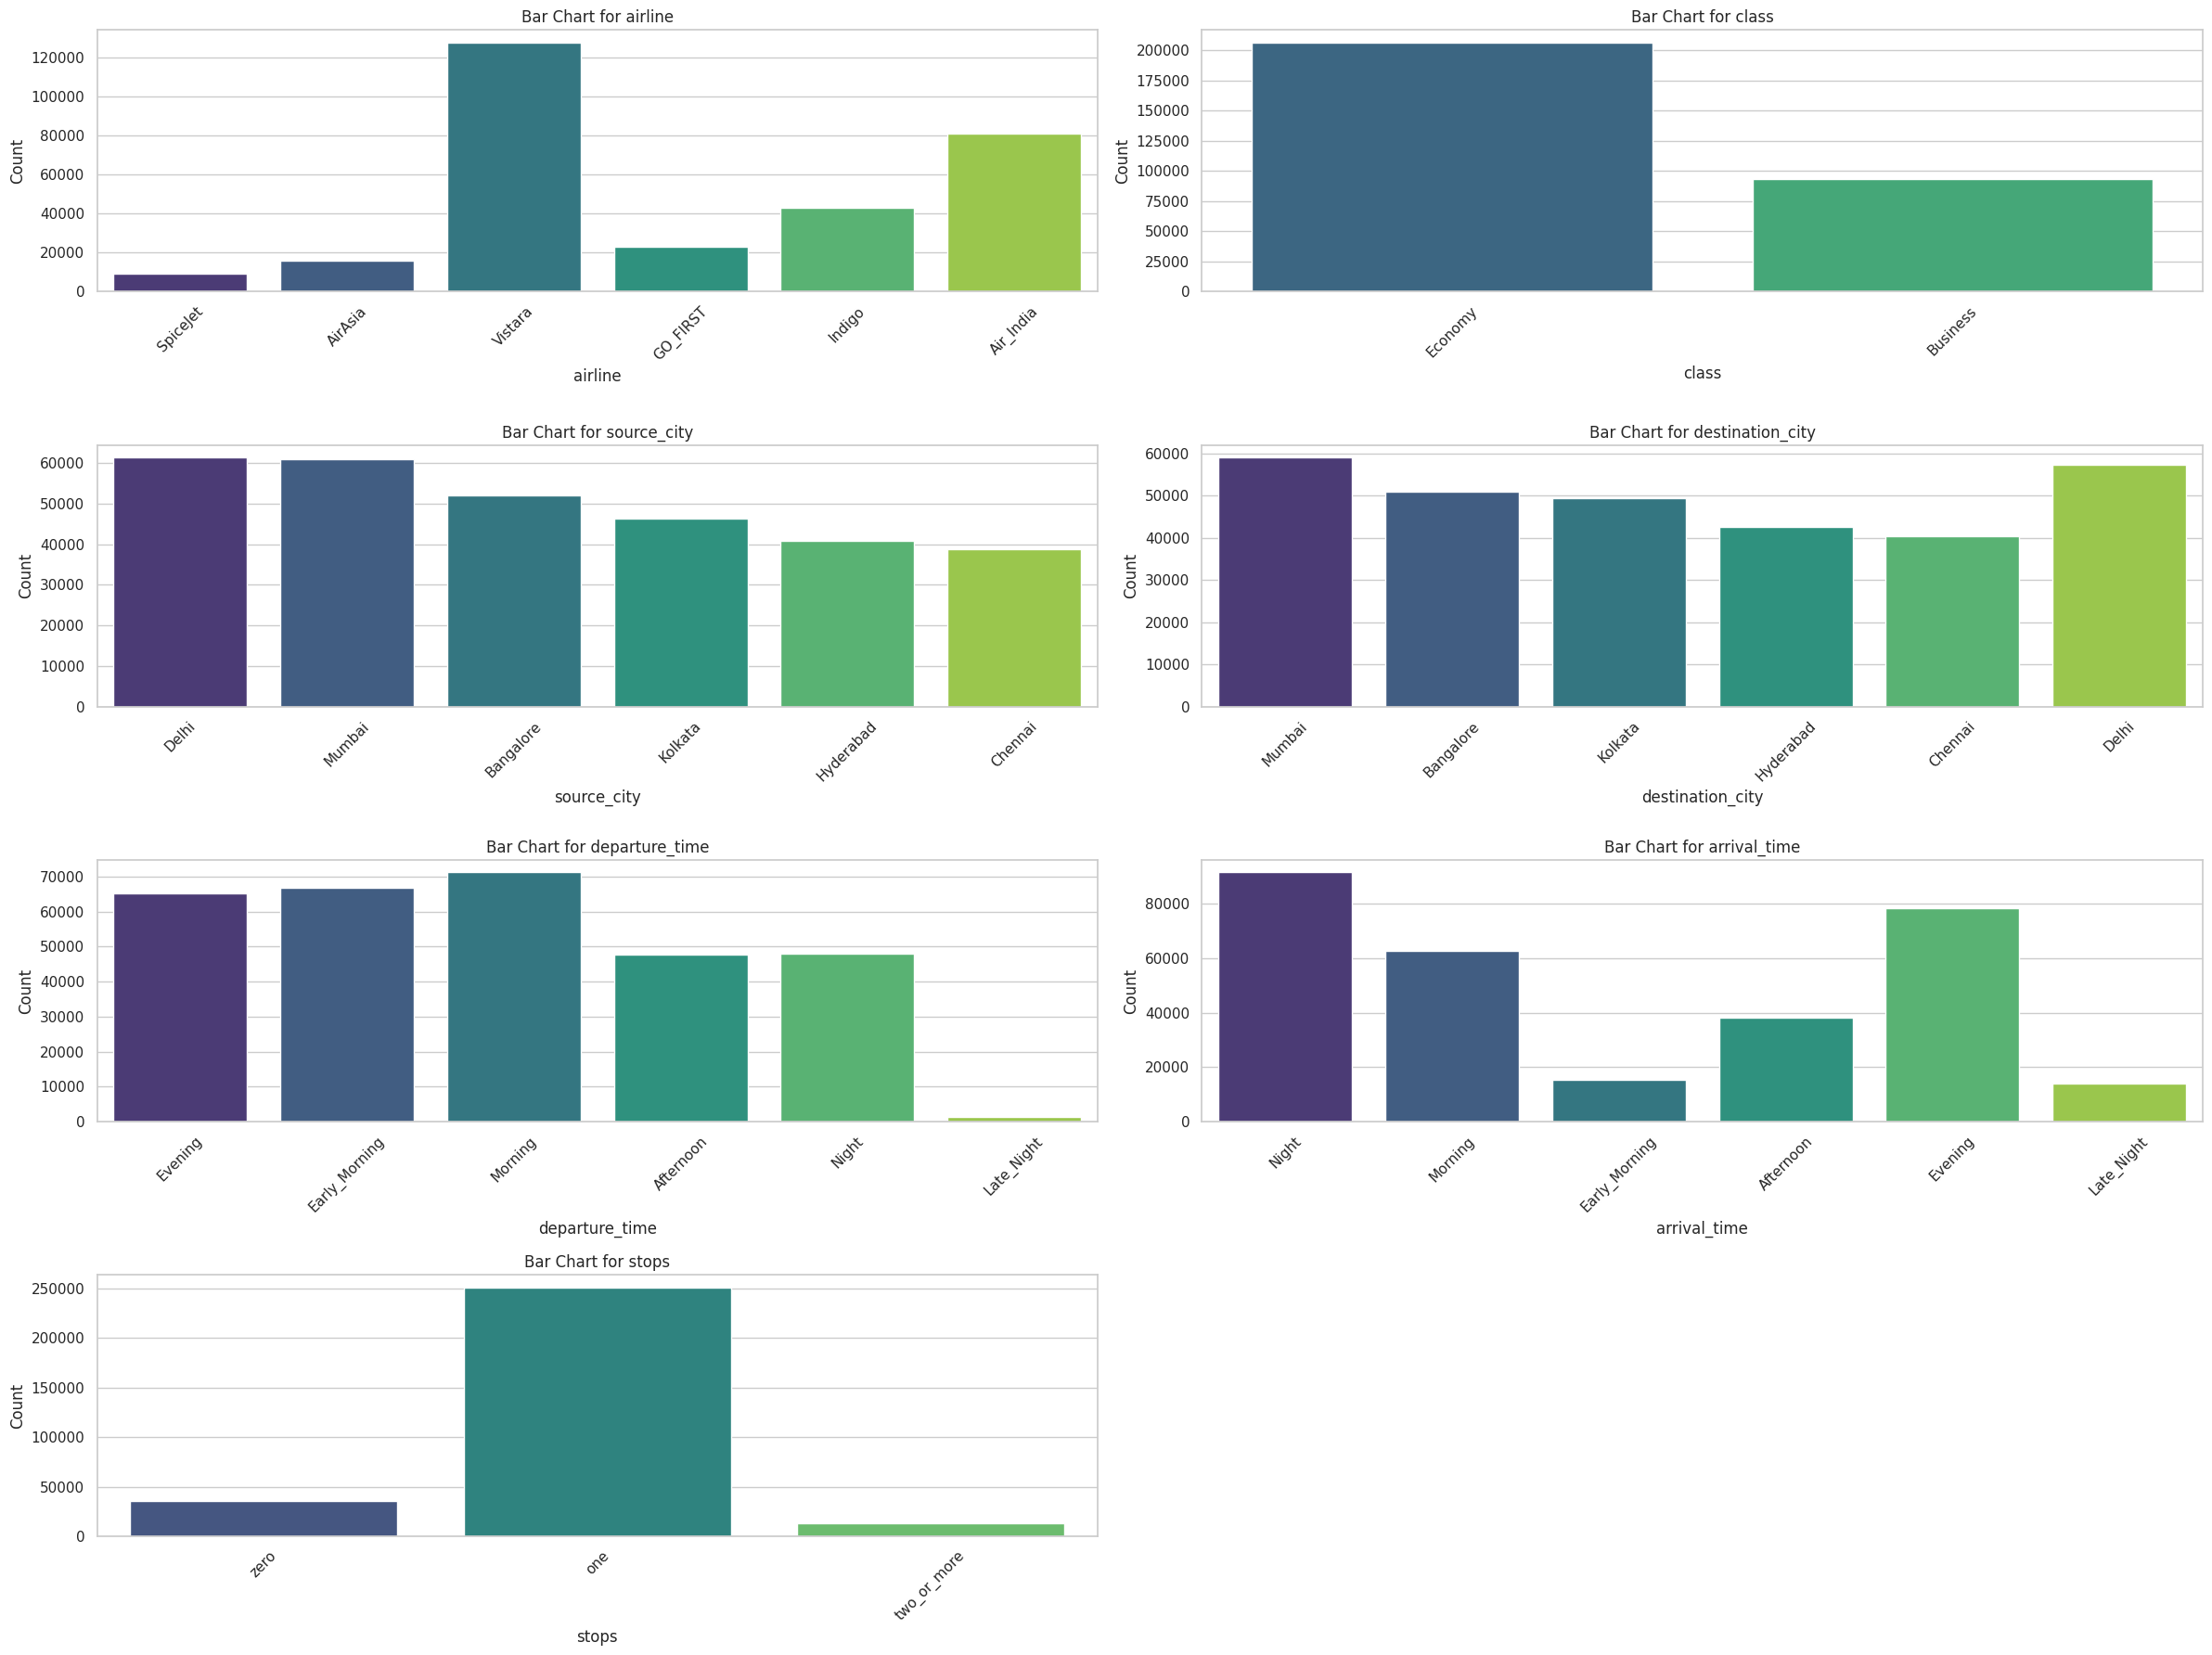

In [17]:
import math
num_cols = len(categorical_cols)
num_rows = math.ceil(num_cols / 2)  # Adjust the number of columns per row here

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for all categorical columns
plt.figure(figsize=(24, 18))
for i, column in enumerate(categorical_cols):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=data, x=column, palette="viridis")
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()

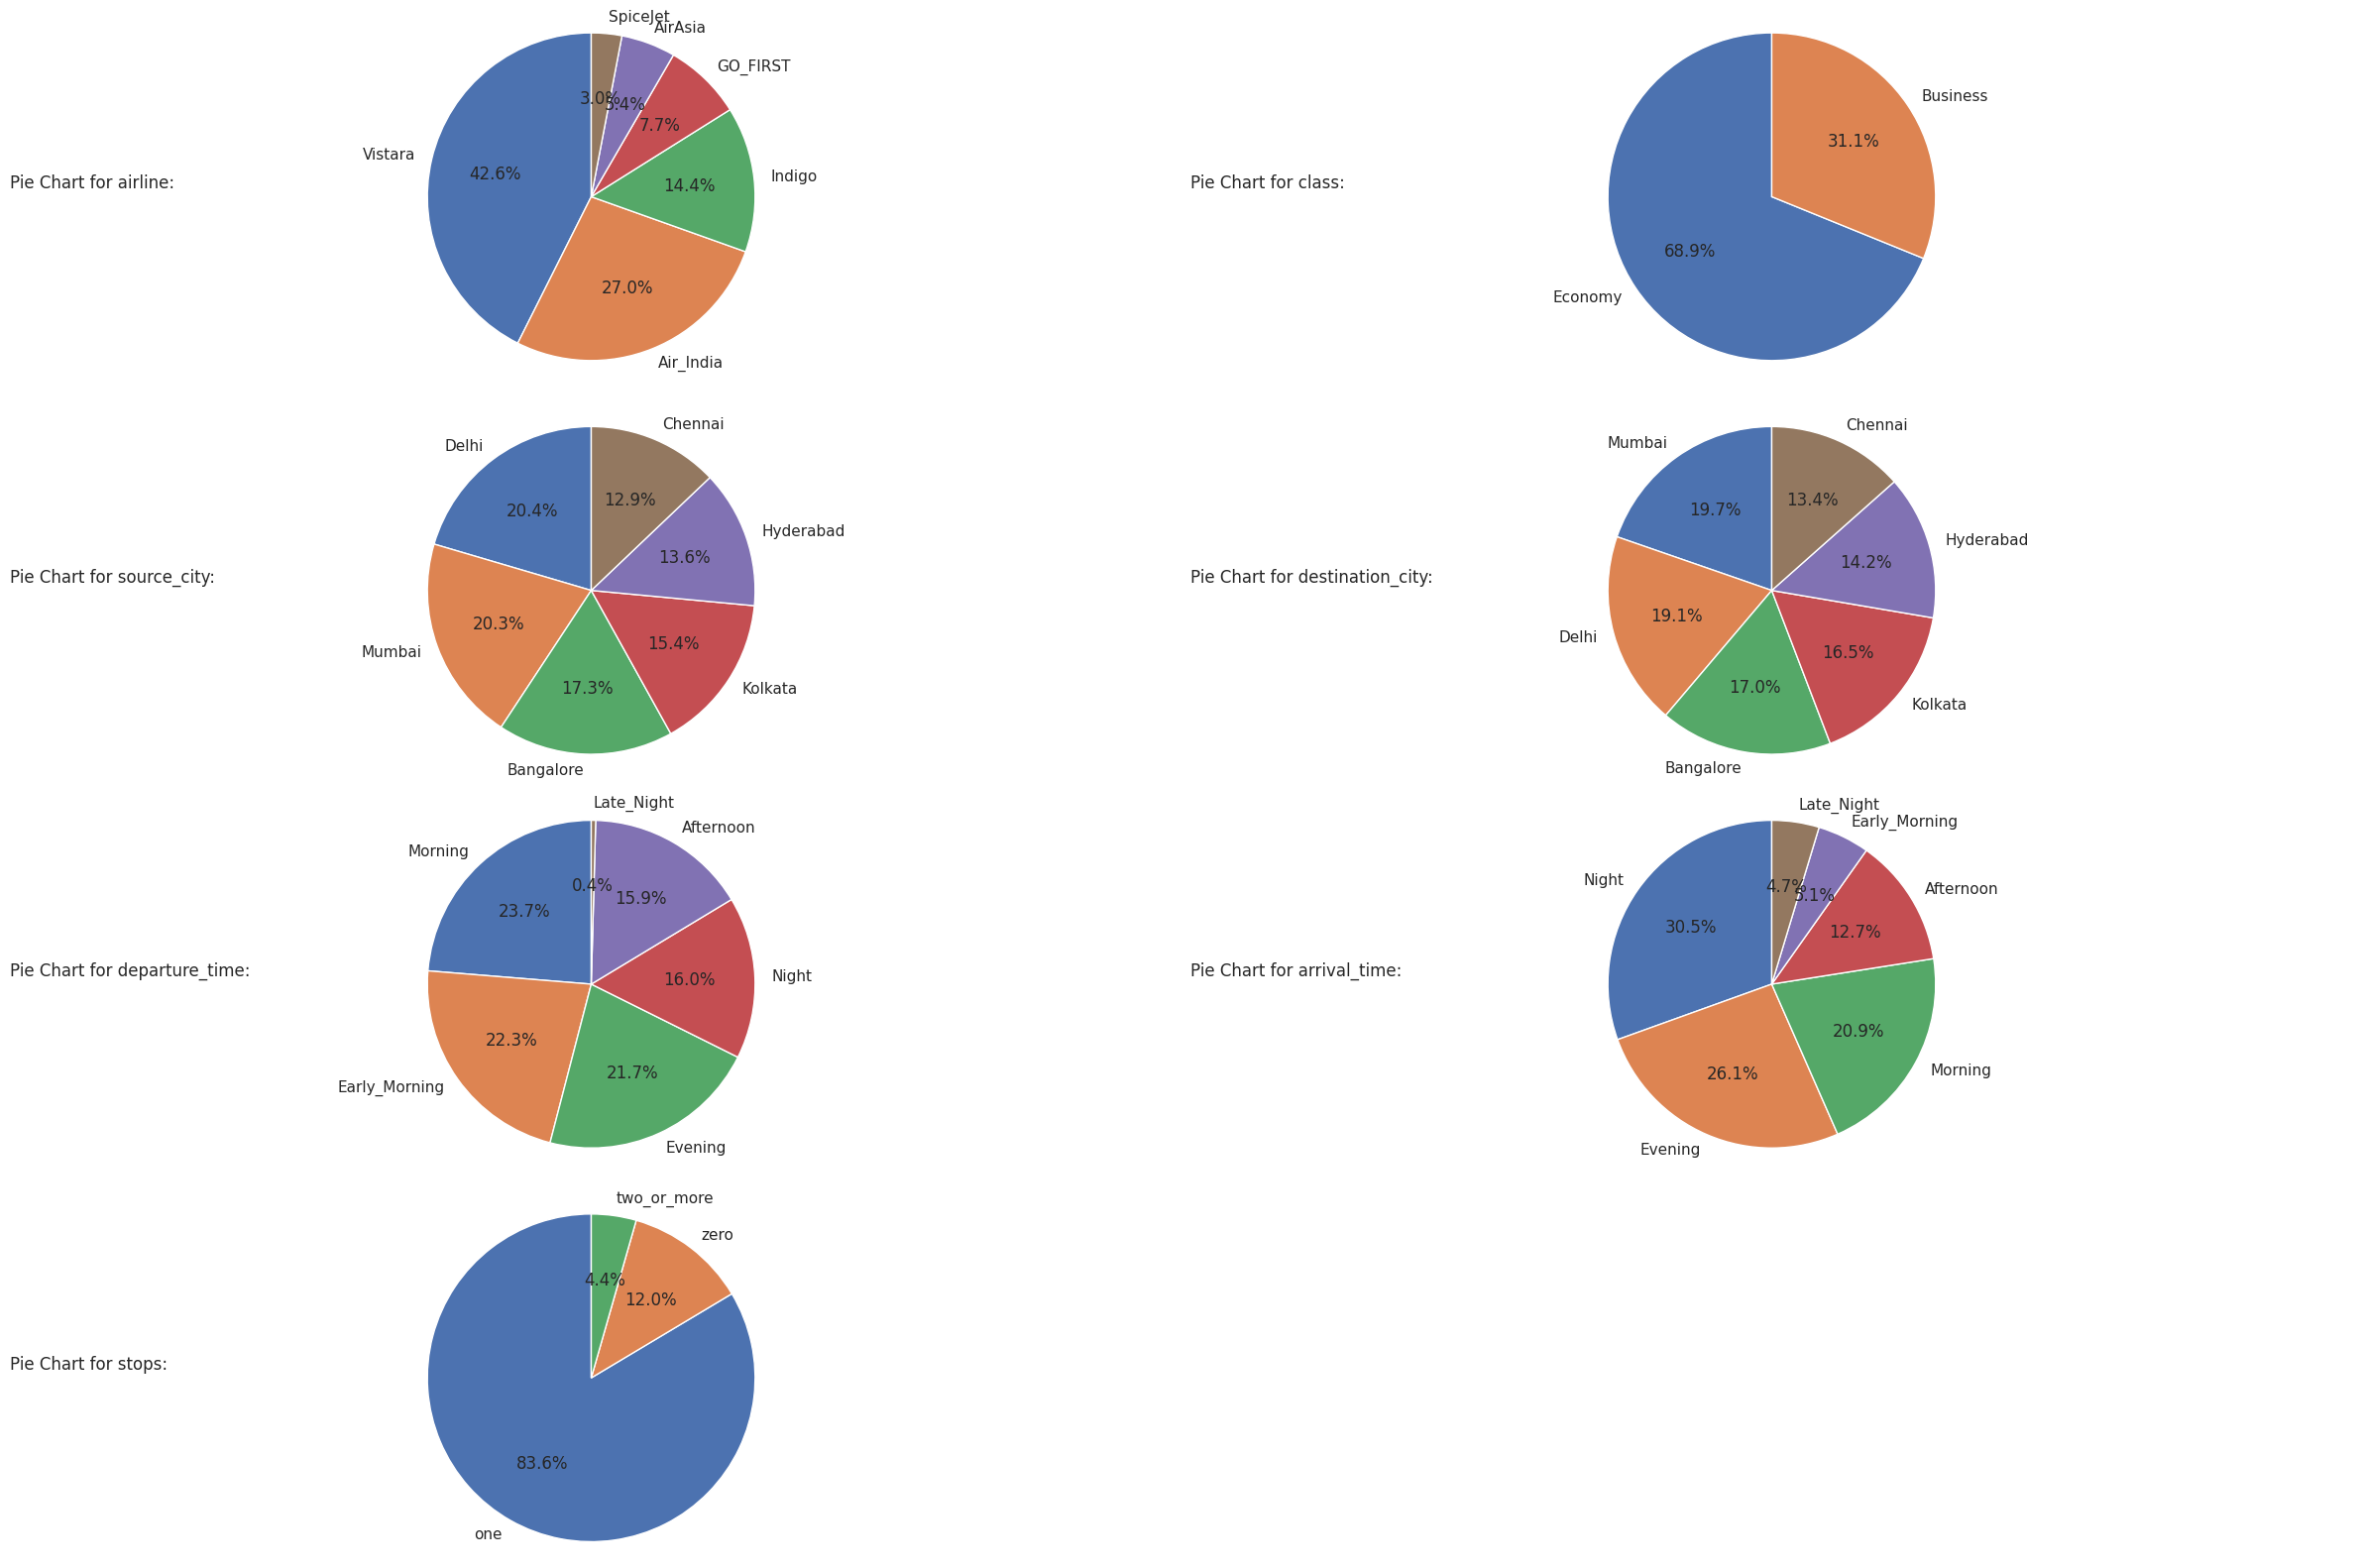

In [18]:
num_cols = 2  # Set the number of columns for the subplots
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

# Create subplots for pie charts
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16))
fig.subplots_adjust(hspace=3)

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Plot pie charts for each categorical column
for i, column in enumerate(categorical_cols):
    ax = axes[i // num_cols][i % num_cols]
    data[column].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart for {column}:', y=0.5, loc="left")
    ax.set_ylabel('')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Hide empty subplots
for i in range(len(categorical_cols), num_rows * num_cols):
    ax = axes[i // num_cols][i % num_cols]
    ax.axis('off')

plt.tight_layout()
plt.show()

We can see that most of the flights are Economy calss, it justifies that the prices are relatively lows

We also notice that flights mostly have a stop which justify the durations of the flighs

Vistara and Air_India have the biggest market parts with 42,6% and 27%

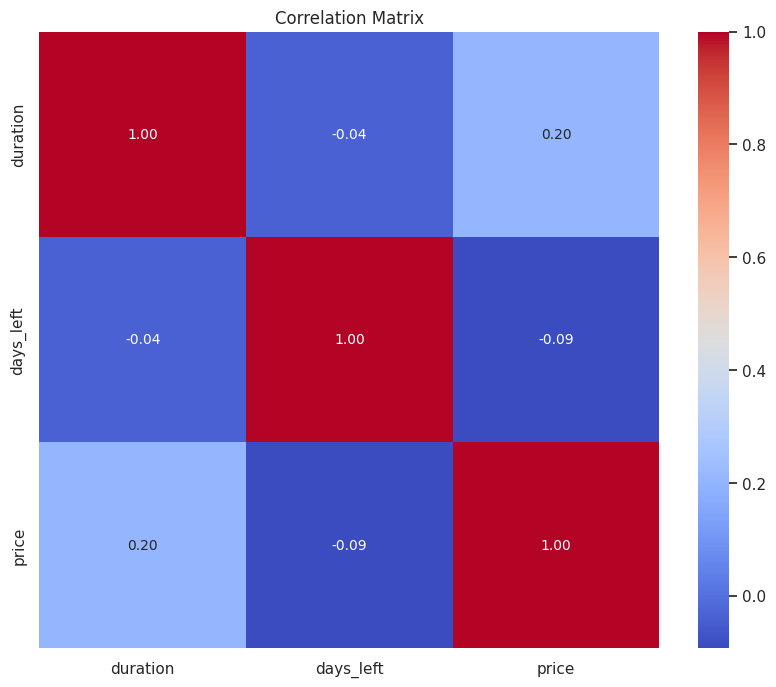

In [19]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

the numerical colums aren't lineary correlated to the price.

This is because of the importance of the categorical features in our data, since information like class departure_city, stops , airline are more important to predict the flight price

In [20]:
# Convert categorical variables into dummy variables and calculate correlations
data_dummies=pd.get_dummies(data,columns=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"],drop_first=True)
data_dummies.corr()

# The 'pd.get_dummies()' function transforms categorical columns into binary indicators (dummy variables).
# 'drop_first=True' is used to prevent multicollinearity by dropping the first level of each categorical variable.
# After creating these dummies, 'df.corr()' computes the correlation matrix of the entire DataFrame.
# This correlation matrix includes correlations among numerical columns and the binary dummy variables
# representing categorical information, providing insights into their relationships.

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,0.033053,-0.049719,...,0.033094,-0.107301,0.122906,-0.064458,0.061271,-0.115412,0.065762,0.061440,-0.043900,-0.138710
days_left,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,...,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.013039
price,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,...,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.937860
airline_Air_India,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,...,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490,-0.124899
airline_GO_FIRST,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,...,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.194540
airline_Indigo,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,...,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242,0.275477
airline_SpiceJet,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,...,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.118325
airline_Vistara,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,...,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.302116
source_city_Chennai,0.033053,0.002581,0.018742,-0.011600,-0.063273,0.033626,0.003331,0.031174,1.000000,-0.194991,...,0.016559,0.009136,-0.024027,0.004418,-0.151660,0.060364,0.016905,0.015972,0.042960,-0.010204
source_city_Delhi,-0.049719,-0.001292,-0.043282,0.009886,0.030585,-0.012615,0.033040,-0.046163,-0.194991,1.000000,...,-0.025908,-0.028147,0.003773,-0.007427,0.061265,-0.246344,0.014093,0.040300,0.066721,0.014098


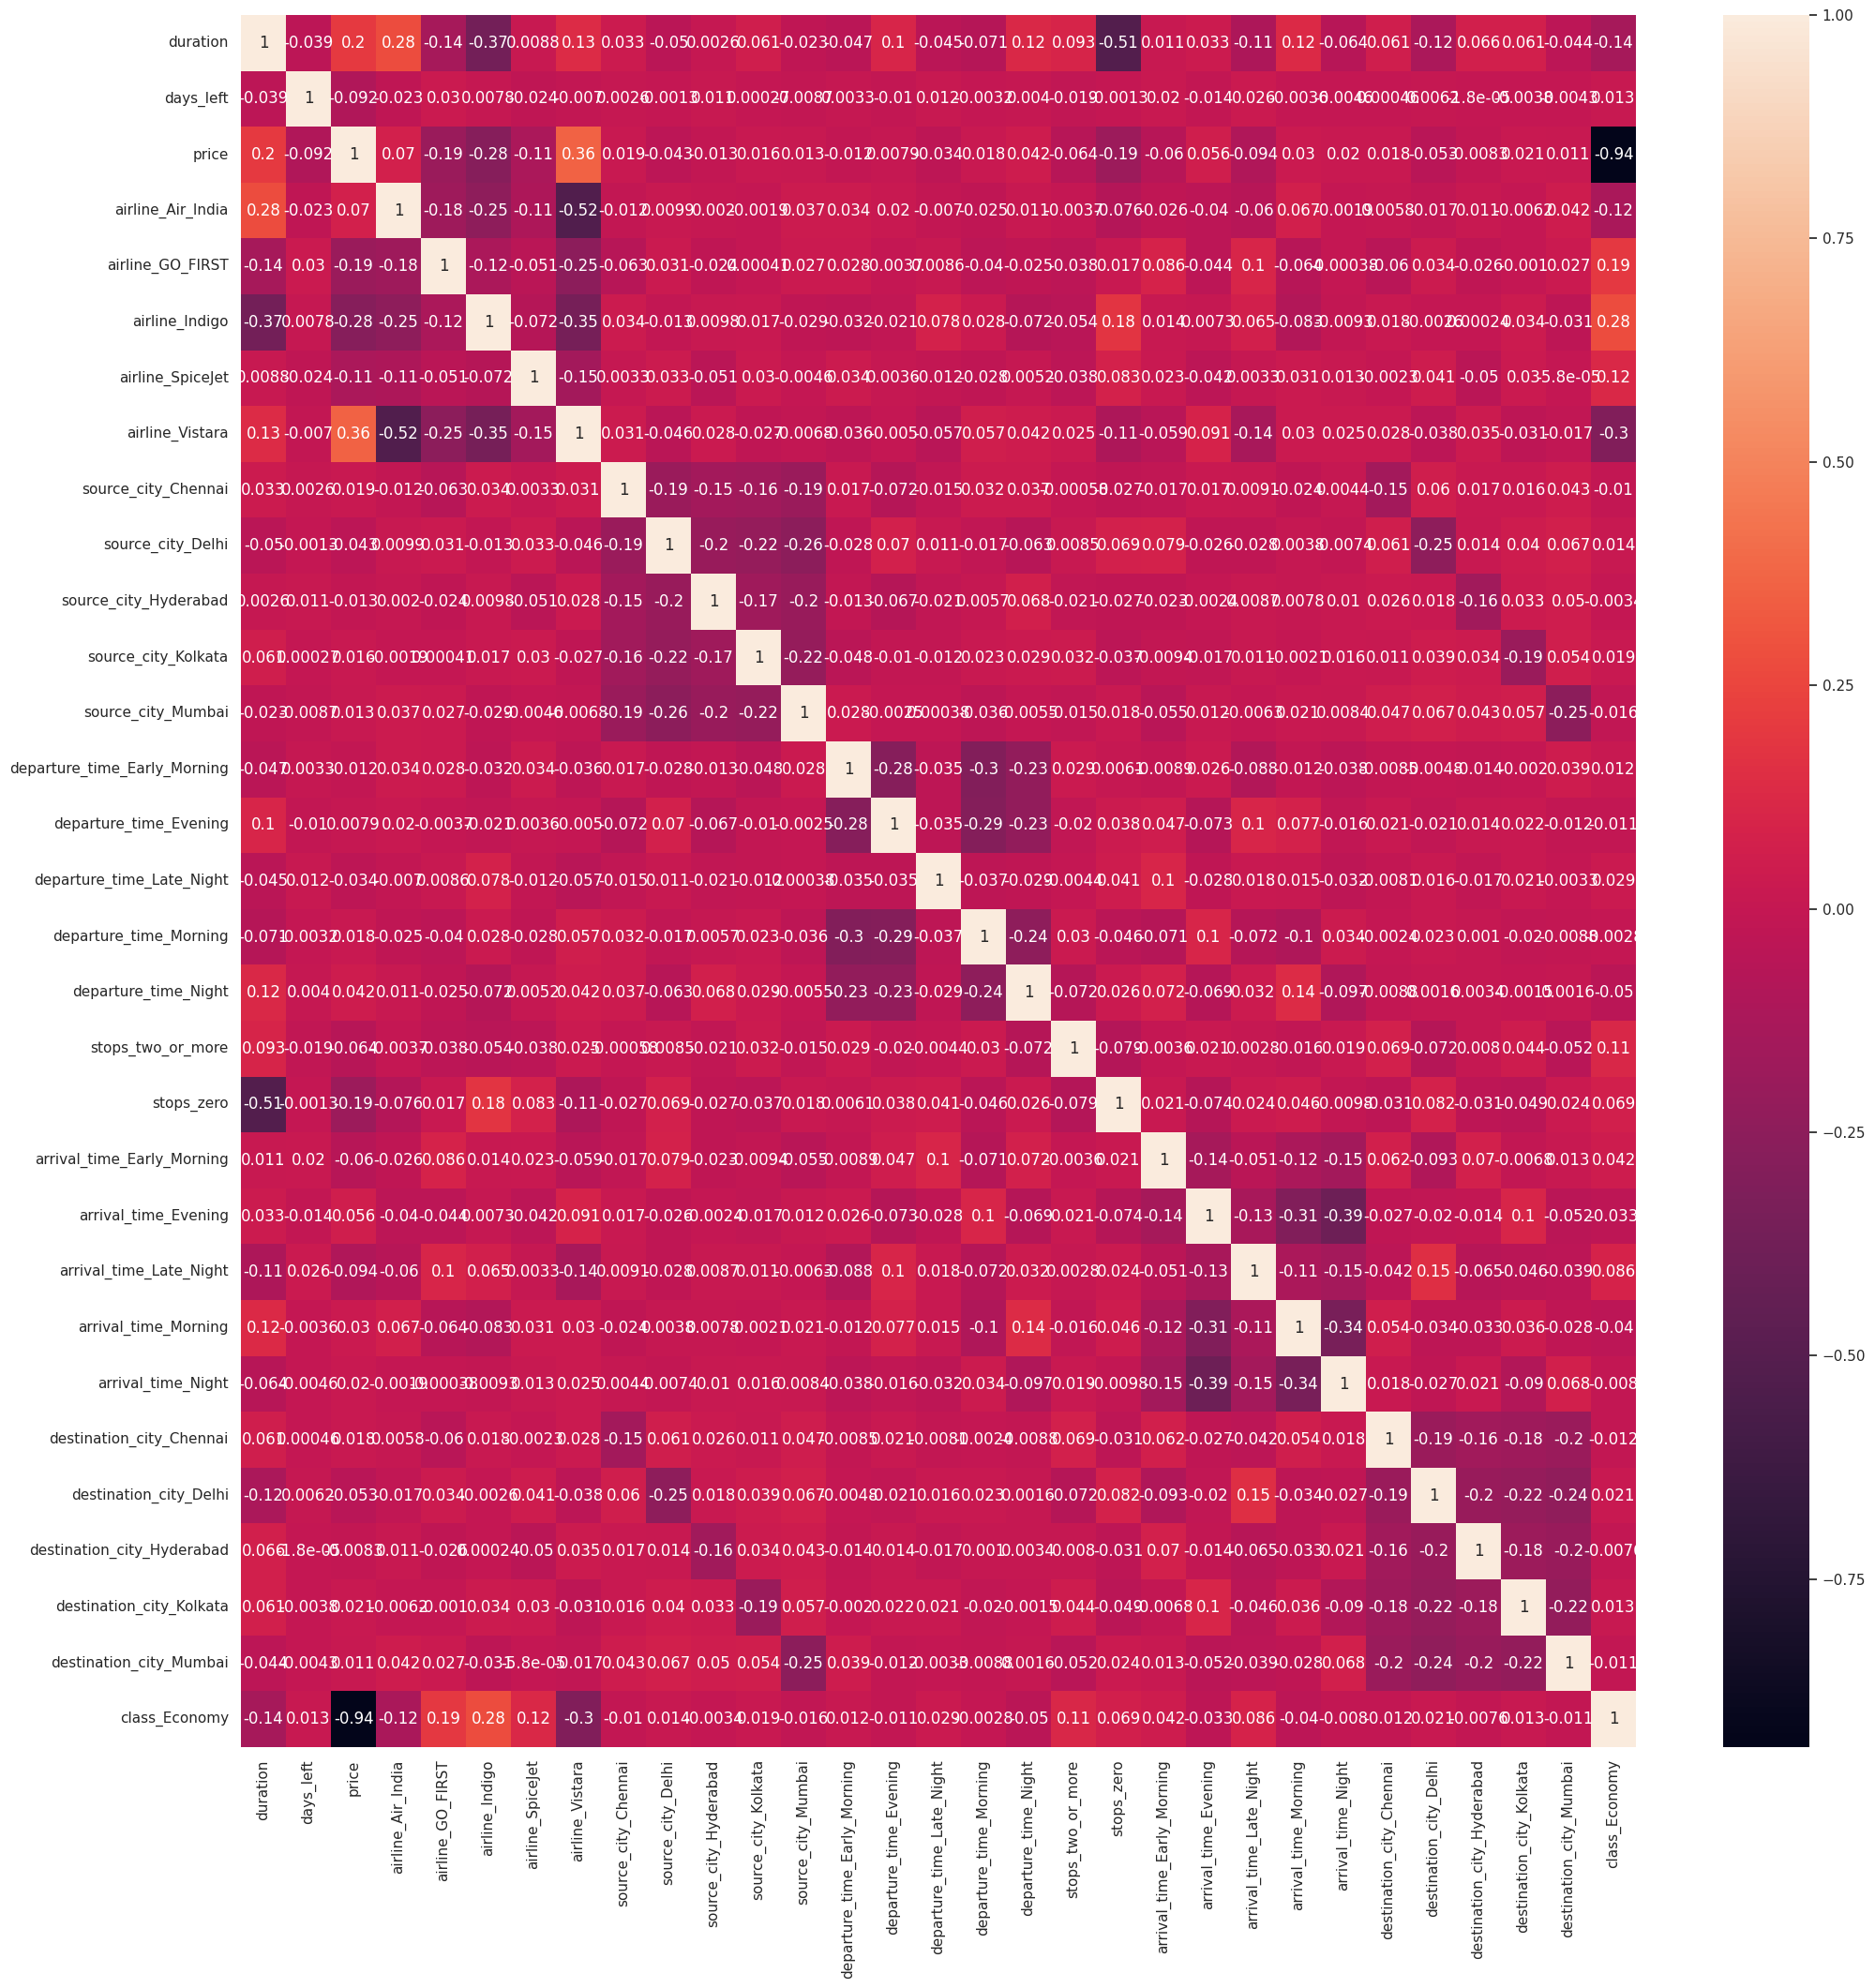

In [21]:
#plot the heatMap
plt.figure(figsize=(24,24))
sns.heatmap(data_dummies.corr(),annot=True);

In [22]:
#print features with high correlation
price_correlation = data_dummies.corr()["price"]
keys = price_correlation.keys()
correlated_features = { key:price_correlation[key] for key in keys  if abs(price_correlation[key]) >= 0.2 and key != "price"}
print(correlated_features)

{'duration': 0.20422236784543674, 'airline_Indigo': -0.2808820821694932, 'airline_Vistara': 0.3608161573520233, 'class_Economy': -0.9378603239059152}


As expected we can see correlations between the price and categorical features:

1.   Strong correlation: -0.94 between price and the economy calss
2.   moderate correlation: 0.36 between price and airline_Vistara

Note that airline_Indigo unlike, airline_Vistara, should be a lowcost airline since the correlation with price is negative and equal to **- 0.28**


#SplitData and apply linear regression

In [23]:
oneHotEncoding_categories = ['airline', 'class', 'source_city', 'destination_city']
ordinalEncoding_categories = ['departure_time', 'arrival_time', 'stops']
numerical_categories = ["duration", "days_left"]
# Ordinal encoding for 'departure_time' and 'arrival_time' and 'stops'
ordinal_categories = [['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'], ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'], ['zero', 'one', 'two_or_more']]


In [27]:
full_pipeline = ColumnTransformer([('std_scaler',StandardScaler(), numerical_categories),
                                   ('oneHotEncoding', OneHotEncoder(handle_unknown="ignore"), oneHotEncoding_categories),
                                   ('ordinalEncoding', OrdinalEncoder(categories=ordinal_categories), ordinalEncoding_categories)])
data_prepared = full_pipeline.fit_transform(data)
print(full_pipeline)


ColumnTransformer(transformers=[('std_scaler', StandardScaler(),
                                 ['duration', 'days_left']),
                                ('oneHotEncoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['airline', 'class', 'source_city',
                                  'destination_city']),
                                ('ordinalEncoding',
                                 OrdinalEncoder(categories=[['Early_Morning',
                                                             'Morning',
                                                             'Afternoon',
                                                             'Evening', 'Night',
                                                             'Late_Night'],
                                                            ['Early_Morning',
                                                             'Morning',
                                          

In [28]:
x=data.drop("price",axis=1)
y=data["price"]
data_prepared = full_pipeline.fit_transform(x)

In [29]:
from sklearn.model_selection import cross_validate
model = LinearRegression()
r2_linear_regression = cross_validate(model, data_prepared, y, cv=10, scoring="r2")
print(r2_linear_regression)
r2_linear_regression["test_score"].mean()

# x_train,x_test,y_train,y_test=train_test_split(data_prepared,y,random_state=12,train_size=0.80)

# # Fitting the model on the training data
# model.fit(x_train, y_train)

# # Predicting on the test data
# y_pred = model.predict(x_test)

# # Evaluating the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# rmse = math.sqrt(mse)
# error_proportion= rmse/y.mean()

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
# print(f"error_proportion: {error_proportion}")

{'fit_time': array([0.88668108, 0.75105596, 0.77461076, 0.84182644, 0.851125  ,
       0.7634275 , 0.67422628, 0.61597371, 0.61622453, 0.68146205]), 'score_time': array([0.02954507, 0.01341057, 0.02283382, 0.00485802, 0.00436068,
       0.01027346, 0.00358605, 0.00351286, 0.01000071, 0.00748301]), 'test_score': array([-0.42932622, -0.15687226, -0.1750795 , -0.08756259, -0.7143765 ,
       -0.3712023 ,  0.80698307,  0.24690368,  0.17293872,  0.18748948])}


-0.052010442372417844

The obtained R-squared value of 0.911 suggests that the model explains around 91.1% of the variance in the target variable using the provided features.
However, the MSE of 5481.24 indicates that the model's predictions still have some level of average deviation from the actual values

We will try to improve those metrics and apply other models